In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
df = pd.read_csv('income.csv')

In [10]:
df.columns = df.columns.str.strip()

In [11]:
df = df.drop(['education'], axis = 1)

In [12]:
df['workclass'],_ = pd.factorize(df['workclass'])
df['marital-status'],_ = pd.factorize(df['marital-status'])
df['occupation'],_ = pd.factorize(df['occupation'])
df['relationship'],_ = pd.factorize(df['relationship'])
df['race'],_ = pd.factorize(df['race'])
df['sex'],_ = pd.factorize(df['sex'])
df['native-country'],_ = pd.factorize(df['native-country'])
df['income'],_ = pd.factorize(df['income'])

In [101]:
corr = df.corr()
corr

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.082380,-0.076646,0.036527,0.424606,0.017201,-0.217767,-0.040000,-0.088832,0.077674,0.057775,0.068756,-0.011572,0.234037
workclass,0.082380,1.000000,-0.006314,0.011343,0.035949,0.217072,0.015524,0.009359,0.019347,0.041172,0.012510,-0.028084,-0.010246,0.047203
fnlwgt,-0.076646,-0.006314,1.000000,-0.043195,-0.023527,0.007892,0.017142,0.000500,-0.026858,0.000432,-0.010252,-0.018768,0.035910,-0.009463
education-num,0.036527,0.011343,-0.043195,1.000000,-0.065996,-0.242997,-0.141075,-0.039760,-0.012280,0.122630,0.079923,0.148123,-0.066044,0.335154
marital-status,0.424606,0.035949,-0.023527,-0.065996,1.000000,0.006524,0.029083,0.012722,0.181870,0.004460,0.006833,-0.000277,0.001912,0.002644
occupation,0.017201,0.217072,0.007892,-0.242997,0.006524,1.000000,-0.016150,0.016586,-0.147779,-0.045060,-0.023963,-0.045240,0.019578,-0.104691
relationship,-0.217767,0.015524,0.017142,-0.141075,0.029083,-0.016150,1.000000,0.096808,0.273414,-0.044045,-0.050498,-0.184873,0.042444,-0.171294
race,-0.040000,0.009359,0.000500,-0.039760,0.012722,0.016586,0.096808,1.000000,0.067840,-0.007991,-0.017190,-0.033115,0.241650,-0.067713
sex,-0.088832,0.019347,-0.026858,-0.012280,0.181870,-0.147779,0.273414,0.067840,1.000000,-0.048480,-0.045567,-0.229309,0.005977,-0.215980
capital-gain,0.077674,0.041172,0.000432,0.122630,0.004460,-0.045060,-0.044045,-0.007991,-0.048480,1.000000,-0.031615,0.078409,-0.009131,0.223329


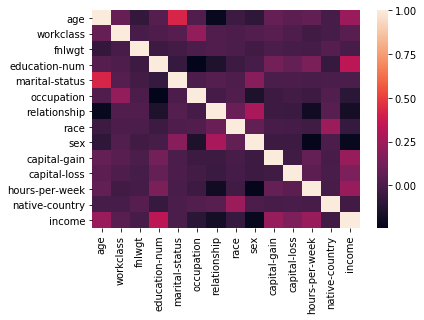

In [102]:
sns.heatmap(corr)

In [106]:
col = np.full((corr.shape[0],), True, dtype = bool)
for i in range(corr.shape[0]) :
    for j in range(i + 1, corr.shape[0]):
        if corr.iloc[i, j] >= 0.9 :
            if col[j] :
                col[j] = False
columns = df.columns[col]
df = df[columns]

In [107]:
columns = columns[:13].values
columns

array(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'], dtype=object)

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
X,y = df.drop(['income'], axis = 1),df['income'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 17)
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 17)
rfe = RFE(tree, )
rfe = rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True False False False False  True False  True
 False]
[1 4 1 1 1 2 8 6 7 1 3 1 5]


In [109]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(tree,cv = 5)
rfecv = rfecv.fit(X,y)
print(rfecv.support_)
print(rfecv.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1]


In [10]:
### Selected Features
from sklearn.model_selection import train_test_split
X,y = df.drop(['income'], axis = 1),df['income'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 17)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 17)

from sklearn.feature_selection import RFECV
rfecv = RFECV(tree,cv = 3)
rfecv = rfecv.fit(X,y)
print(rfecv.support_)
print(rfecv.ranking_)

[ True False  True  True  True  True False False False  True  True  True
 False]
[1 2 1 1 1 1 6 4 5 1 1 1 3]


In [ ]:
## Distribution
#df = df.drop(['income', 'workclass', 'relationship', 'race', 'sex','native-country'], axis = 1)
plt.hist(df)

In [111]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(tree,cv = 6)
rfecv = rfecv.fit(X,y)
print(rfecv.support_)
print(rfecv.ranking_)

[ True  True  True  True  True  True False False False  True  True  True
 False]
[1 1 1 1 1 1 5 3 4 1 1 1 2]


In [114]:
import statsmodels.formula.api as sm
def backwardElimination(X, y, sl, columns):
    numVars = len(X[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, X).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    X = np.delete(X, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return X, columns
SL = 0.05
data_modeled, columns = backwardElimination(df.iloc[:,1:].values, df.iloc[:,0].values, SL, columns)

In [115]:
columns

array(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'capital-gain', 'hours-per-week', 'native-country'],
      dtype=object)